# МОДЕЛЬ ПРЕДСКАЗАНИЯ ОТТОКА КЛИЕНТОВ ОПЕРАТОРА СВЯЗИ «НИЕДИНОГОРАЗРЫВА.КОМ»

**Цель работы**

Оператор связи «Ниединогоразрыва.ком» хочет научиться **прогнозировать отток клиентов**. Если выяснится, что пользователь **планирует уйти**, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

*Важно отметить*, что для менеджера по удержанию клиентов нужно понимать кому из клиентов нужно предлагать специальные условия, так как:
- для удержания действующего клиента требуются затраты, целью которых является получение дальнейшей прибыли, а не убытка
- привлечение новых клиентов более затратно, чем удержать действующих

**Задачи исследования**

1) Постановка задачи. Уточнение деталей с заказчиком. Получение исходных данных
2) Исследовательский анализ имеющихся данных
3) Подготовка данных для машинного обучения
4) Обучение моделей ML. Выбор лучшей модели и параметров
5) Подведение итогов. Рекомендации заказчику

**Конечный результат работы**

Получить модель **ML**, предсказывающая клиента, которых учет уйти с точностью не менее 85%

## План работы и исследование данных

### План проведения исследования

1) Постановка задачи. Уточнение деталей с заказчиком. Получение исходных данных
- Общие сведения. Получение ТЗ от заказчика. Выяснение конечного результата, который ожидается в ходе исследования. Где и как будут использоваться результаты работы?
- Изучение имеющейся информации. Уточнение деталий с заказчиком
- Описание исходных условий, файлов с данными, признаков имеющихся датафреймов

2) Исследовательский анализ данных
- Общая информамия о датафрейме
- Вывод первых строк таблиц
- Количество пропусков
- Статистические данные
- Количество дубликатов
- Анализ признаков исходных датафреймов

3) Подготовка данных для машинного обучения
- Объединение файлов в единый датафрейм
- Визуализация распределения признаков объединённого датафрейма
- Наличие пропусков после объединения датафреймов
- Поиск дубликатов
- Корреляционный анализ признаков

4) Обучение моделей ML. Выбор лучшей модели и параметров
- Подготовка данных для машинного обучения
- Разделение на выборки train/test, test_size=0.25
- Кодирование категориальных признаков
- Обучения моделей ML для прогнозирования оттока клиентов
- Минимум две модели и хотя бы для одной из них подобрать как минимум два гиперпараметра
- Лучшую модель выбираем по метрике на кросс-валидации.
- Анализ точности и качества работы моделей ML
- Качество выбранной модели проверяем на тестовой выборке (одной лучшей модели, не всех, мы не меняем выбор, если у другой модели на тесте качество получилось лучше).
- Метрика roc_auc не чувствительна к дисбалансу классов, балансировать не нужно
- Метрики качества: accuracy
- Можно выполнить графический анализ «Матрица ошибок» с выведенными полнотой и точностью на график.
- Минимальный порог для успешной сдачи : AUC-ROC=0.85
- При делении на выборки соотношение тренировочной к тестовой = 3/1

5) Подведение итогов. Рекомендации заказчику
- Прогноз оттока клиентов на основе данных моделей ML
- Проверка прототипа решения на соответсвие условиям задачи и непротиворечивость интерпритации результатов
- Общие выводы по исследованию. Рекомендации для заказчика

### Общие сведения

**Исходные условия**

Оператор предоставляет два основных типа услуг: 

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание файлов с данными**

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

**Описание признаков датафреймов**

- **customerID** - уникальный идентификатор пользователя
- **BeginDate** – дата начала пользования услугами,
- **EndDate** – дата окончания пользования услугами,
- **Type** – тип оплаты: ежемесячный, годовой и тд,
- **PaperlessBilling** – электронный платёжный документ,
- **PaymentMethod** – способ оплаты,
- **MonthlyCharges** – ежемесячные траты на услуги,
- **TotalCharges** – всего потрачено денег на услуги
- **gender** - пол клиента
- **Senior Citizen** – наличие пенсионного статуса по возрасту
- **Dependents** – наличие иждивенцев
- **Partner** – наличие супруга(и)
- **InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies** - вид услуг, используемый клиентом
- **MultipleLines** – наличие возможности ведения параллельных линий во время звонка

## Исследовательский анализ данных

### Импорт библиотек и данных

In [1]:
# # установка библиотек
# !pip install phik

# # обновление библиотек
# !pip install -U -q scikit-learn
# !pip install -U -q matplotlib
# !pip install -U -q seaborn
# !pip install --upgrade scikit-learn

In [2]:
# для анализа и работы с данными
import numpy as np
import pandas as pd
import os
import re
import phik
from phik.report import plot_correlation_matrix
from phik import report
from statsmodels.stats.outliers_influence import variance_inflation_factor

# для графического отображения результатов
import seaborn as sns
import matplotlib.pyplot as plt

# пайплайн
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler)

# алгоритмы машинного обучения
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb

# метрики для алгоритмов ML
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score,
                             accuracy_score)
from sklearn.metrics import roc_curve

# константы
RANDOM_STATE = 280823

# для игнорирования ошибок в проекте
import warnings
warnings.filterwarnings("ignore")

# настройка отображения чисел и таблиц
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.width', 500)

# общее формление для графиков
sns.set(style="white", palette="Paired")

In [3]:
# загрузка датафреймов (try - локально, except - по ссылке)
try:
    df_contract = pd.read_csv('D:\jupyter notebook EDU\data\contract_new.csv')
    df_personal = pd.read_csv('D:\jupyter notebook EDU\data\personal_new.csv')
    df_internet = pd.read_csv('D:\jupyter notebook EDU\data\internet_new.csv')
    df_phone = pd.read_csv('D:\jupyter notebook EDU\data\phone_new.csv')
    
except:
    df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

### Функции для работы в проекте

In [4]:
def df_info(df):
    '''
    функция для вывода основных показателей датафреймов
    
    '''
    print("-"*100)
    print('Общая информамия о датафрейме:')
    print("-"*100)
    print(df.info())
    
    print("-"*100)
    print('Первые 5 строк таблицы')
    print("-"*100)
    display(df.head(5))
    
    print("-"*100)
    print('Количество пропусков')
    print("-"*100)
    print(df.isnull().sum().sort_values(ascending=False))
    
    print("-"*100)
    print('Статистические данные датафрейма')
    print("-"*100)
    display(np.round(df.describe(), 2).T)
    
    print("-"*100)
    print('Количество дубликатов:')
    print("-"*100)
    display(df.duplicated().sum())
       
    print("/"*100)
    print('Следующий датафрейм')   

In [5]:
def plot_kde(data,
            xlabel = '',
            figsize = (15, 5),
            label = '',
            suptitle = '',
            ylabel = '',
            lg = '',
            hue = None):
    '''
    функция для отрисовки графиков
    
    '''
    
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(suptitle, fontsize = 16)

    plot = sns.kdeplot(data,
                       alpha=.4,
                       shade=True,
                       label=label,
                       hue=hue) 

    plot.grid(linewidth = 1, linestyle=':')
    
    plot.set_xlabel(xlabel, fontsize=14)
    plot.set_ylabel(ylabel, fontsize=14)
        
    return plot

In [6]:
def create_pipeline(name, model, param_grid, features_train, target_train, cat_features, num_features):
    '''
    функция формирует пайплайн и передаёт сего в GridSearchCV для поиска лучших параметров по переданной сетке
    
    '''

    if name == 'LogisticRegression':    
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), num_features),
                ('cat', Pipeline([
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
                ]), cat_features)
            ])
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', 'passthrough', num_features),
                ('cat', Pipeline([
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
                ]), cat_features)
            ])
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)])
    
    grid_pipe = GridSearchCV(pipeline,
                             param_grid,
                             cv = 2, #3,
                             scoring='roc_auc',
                             n_jobs = -1,
                             verbose = False)

    grid_ = grid_pipe.fit(features_train, target_train)
    get_results(grid_pipe, name)

    pipeline.set_params(**grid_.best_params_)
    
    pipeline.fit(features_train, target_train)
    
    return pipeline

In [7]:
def create_param_grid(features_train, target_train, random_state=RANDOM_STATE):
    '''
    функция в цикле передаёт сетку модель и сетку параметро в create_pipeline
    
    '''
    
    param_grid = [
        (
            'LogisticRegression',
            LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'), 
            {
                'model__C': np.logspace(-3,3,20),
                'model__penalty': ["l1", "l2"]
            }
        ),
        (
            'DecisionTreeClassifier',
            DecisionTreeClassifier(random_state=RANDOM_STATE),
            {
                'model__criterion': ['gini','entropy'],
                'model__max_depth': range(1, 6)
            }
            
        ),
        (
            'RandomForestClassifier',
            RandomForestClassifier(random_state=RANDOM_STATE),
            {
                'model__n_estimators': range(10, 101, 30),
                'model__max_depth': range(1, 6)
            }
            
        ),
        (
            'CatBoostClassifier',
            cb.CatBoostClassifier(verbose=False, random_state=RANDOM_STATE),
            {
                'model__learning_rate': [0.01, 0.03, 0.001],
                'model__depth': range(1, 6)
            }
            
        )
    ]
    fit_model_list = []
    for name, model, grid in param_grid:
        fit_model = create_pipeline(name, model, grid, features_train, target_train, cat_features=cat_features, num_features=num_features)
        fit_model_list.append(fit_model)
    return fit_model_list

In [8]:
def get_results(fit_model, name):
    '''
    функция для вывода результатов моделей с лучшими параметрами
    
    '''
    
    print('-----'* 20, f'\nModel:\n{name}:\n')
    print(f'Params:\n{fit_model.best_params_}\n')
    print(f'ROC-AUC:\n{fit_model.best_score_}\n')

In [9]:
def plot_roc_curve(target_test, predicted_test):
    '''
    функция для построения ROC-AUC кривой
    
    '''
    fpr, tpr, thresholds = roc_curve(target_test, predicted_test)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

In [10]:
def plot_conf_matr(model_best, f_test, t_test):
    '''
    функция для создания матрицы ошибок
    
    '''
    predictions = model_best.predict(f_test)
    print(f'Количество записей: {t_test.shape[0]}\n')

    cf_matrix = confusion_matrix(predictions, t_test)

    ax = sns.heatmap(cf_matrix, annot= True , fmt="d",  cmap='Blues')

    ax.set_title('Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');


    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

In [11]:
def plot_importances(data):
    '''
    функция для оценки важности признаков
    
    '''
    sns.barplot(x=data.sort_values(by=0).values.reshape((13,)),
                y=np.array(data.sort_values(by=0).index))

    plt.title('Оценка важности признаков')
    plt.ylabel('признаки')
    plt.xlabel('важность');

### Общая информамия по датафреймам

In [12]:
# список датафреймов
df_all = [df_contract, df_personal, df_internet, df_phone]

In [13]:
# посмотрим на перечень признаков во всех датафреймах
for i in df_all:
    print(i.columns)

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')
Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], dtype='object')
Index(['customerID', 'MultipleLines'], dtype='object')


In [14]:
# цикл for для перебора датафреймов в списке df_all и вывода общей информации по ним из функции df_info
for df in df_all:
    df_info(df)

----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк таблицы
--------

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.8500,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.9500,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.8500,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3000,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7000,353.5


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0000,64.7600,30.0900,18.2500,35.5000,70.3500,89.8500,118.7500


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

////////////////////////////////////////////////////////////////////////////////////////////////////
Следующий датафрейм
----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк таблицы
----------------------------------------------------------

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0000,0.1600,0.3700,0.0000,0.0000,0.0000,0.0000,1.0000


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

////////////////////////////////////////////////////////////////////////////////////////////////////
Следующий датафрейм
----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
---------------------------------

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
customerID,5517,5517,5338-YHWYT,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

////////////////////////////////////////////////////////////////////////////////////////////////////
Следующий датафрейм
----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк таблицы
----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
customerID       0
MultipleLines    0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
customerID,6361,6361,5338-YHWYT,1
MultipleLines,6361,2,No,3390


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

////////////////////////////////////////////////////////////////////////////////////////////////////
Следующий датафрейм


<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п. 1.2.1**
    
- У датафреймов разное количество строк (7043, 5517 и 6361)
- Названия признаков в виде слитных слов, разделенных прописной буквой (например, customerID). Нужно привести в змеиный вид (в виде customer_ID)
- Пропусков нет
- Дубликатов нет
- Данные имеют как категориальное значение (например, PaperlessBilling, PaymentMethod), так и числовые значения (например признак MonthlyCharges, 29.85)
- признак TotalCharges имеет тип данных **object**, однако, глядя на первые строки таблицы в этой колонке значения похожи на значения в колонке **MonthlyCharges**. Нужно выяснить в чем причина и привести данные к нужному формату. Данную рпоцедуру проведем в разделе *1.3 Подготовка данных для машинного обучения*

### Распределение значений в признаках датафреймов

<function matplotlib.pyplot.show(close=None, block=None)>

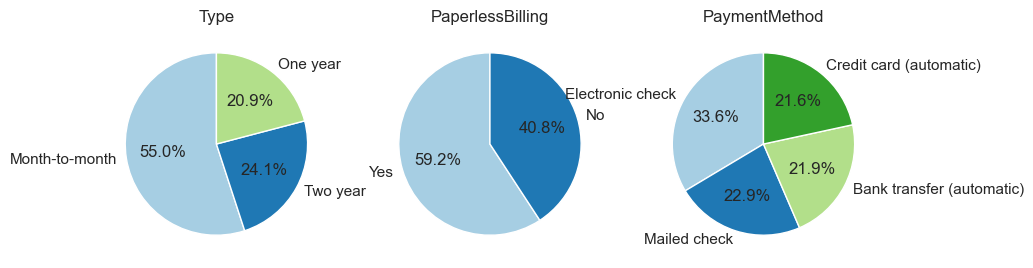

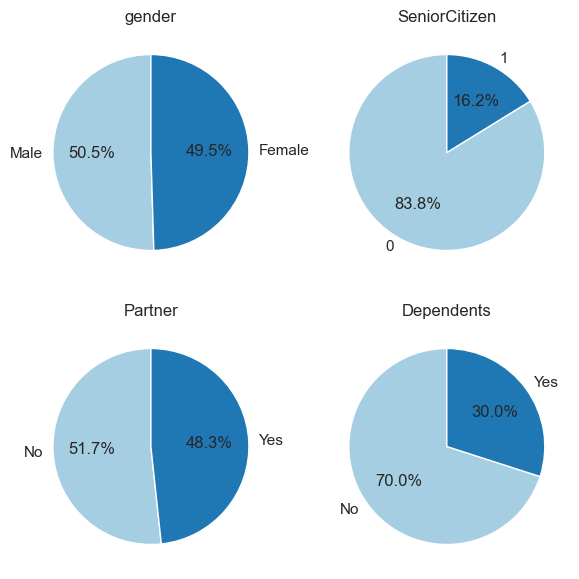

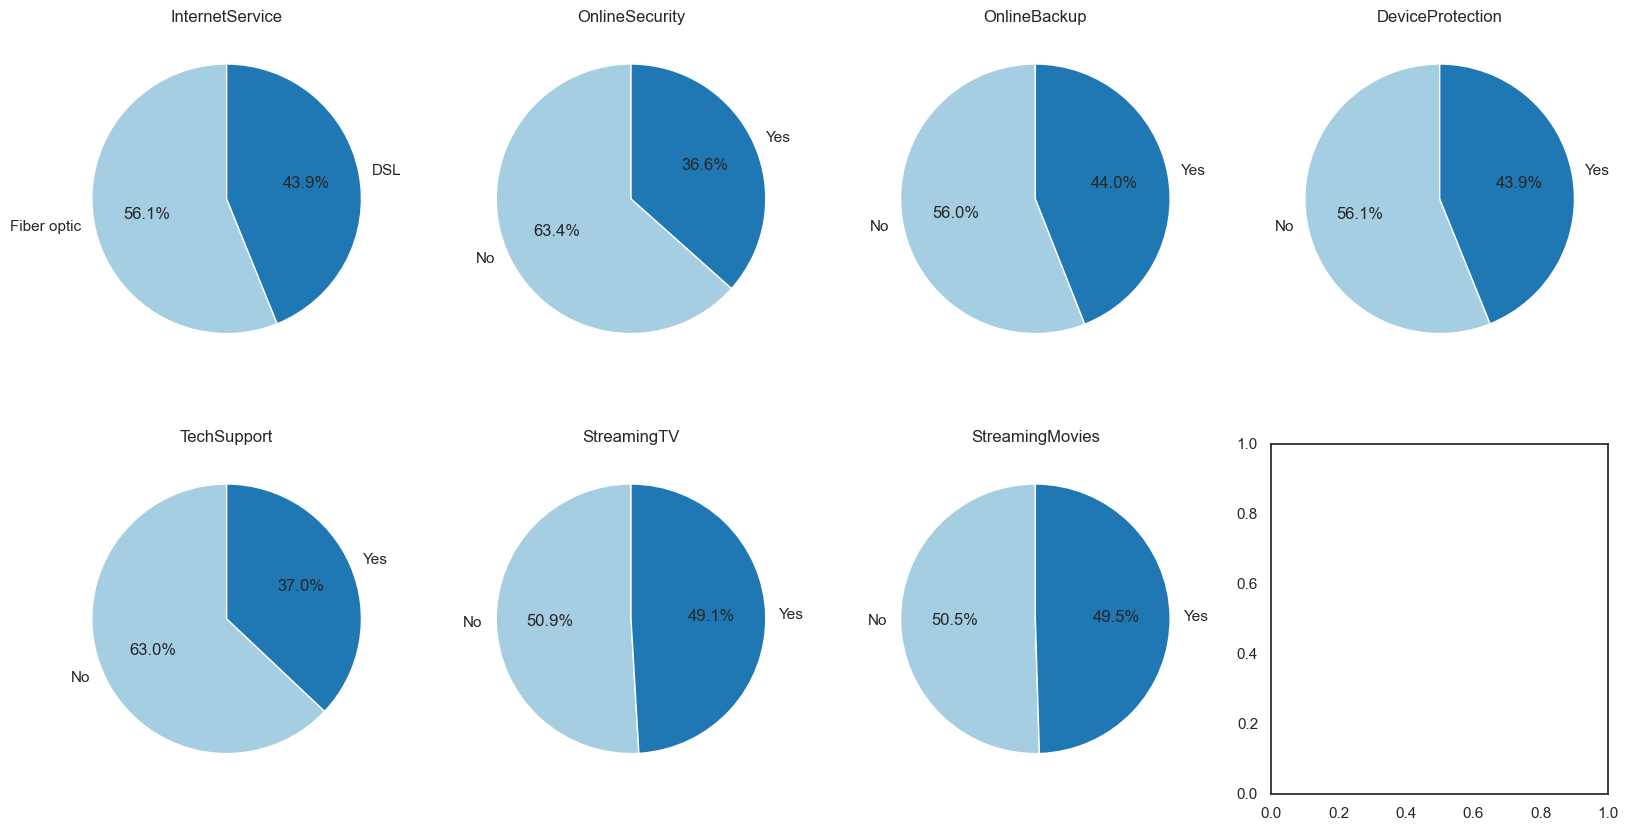

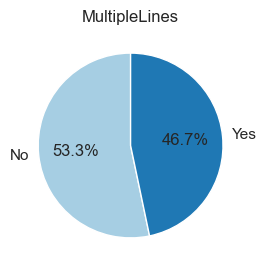

In [15]:
# Для датафрейма df_contract
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs = axs.flatten()

for i, col in enumerate(['Type', 'PaperlessBilling', 'PaymentMethod']):
    df = df_contract[col].value_counts(normalize=True)
    labels = df.index
    sizes = df.values
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)

# Для датафрейма df_personal
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs = axs.flatten()

for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    df = df_personal[col].value_counts(normalize=True)
    labels = df.index
    sizes = df.values
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)

# Для датафрейма df_internet
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']):
    df = df_internet[col].value_counts(normalize=True)
    labels = df.index
    sizes = df.values
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)

# Для датафрейма df_phone
fig, axs = plt.subplots(1, 1, figsize=(3, 3))

df = df_phone['MultipleLines'].value_counts(normalize=True)
labels = df.index
sizes = df.values
axs.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axs.set_title('MultipleLines')

plt.show

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п. 1.2.2**
    
- по периодичности оплаты преобладают ежемесячные платежы
- наиболее часто клиенты принимают электронные платежные документы
- способ оплаты преобладает электронные переводы, в целом способы оплаты распределены почти равномерно
- по половому признаку количество клиентов одинаковое
- доля клиентов пенсионного возрастасоставляет чуть более 16%
- доля клиентов у которых есть иждивенцы - 30%
- по использованию таких видов услуг как интернет, онлайн-безопасность и другие - распределением практически равномерное (да/нет)

### Расходы клиентов на услуги оператора связи

In [16]:
df_contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.8500,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.9500,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.8500,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3000,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7000,353.5


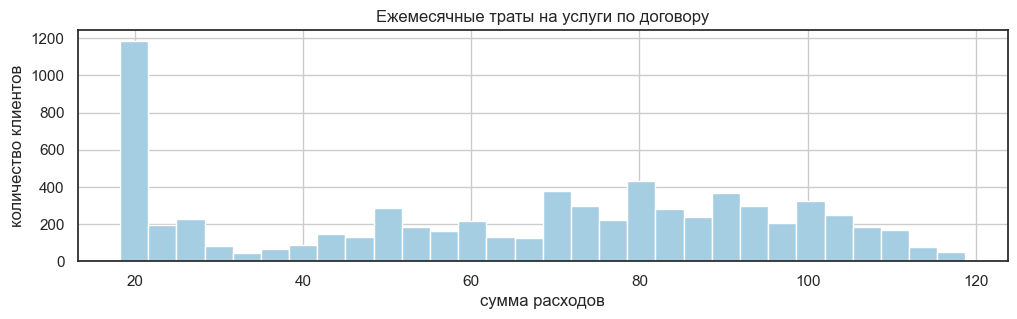

In [17]:
# график зависимости количества комментариев от их длинны
plt.figure(figsize = (12, 3))
df_contract['MonthlyCharges'].hist(bins=30);
plt.title('Ежемесячные траты на услуги по договору')
plt.xlabel('сумма расходов')
plt.ylabel('количество клиентов')

plt.show()

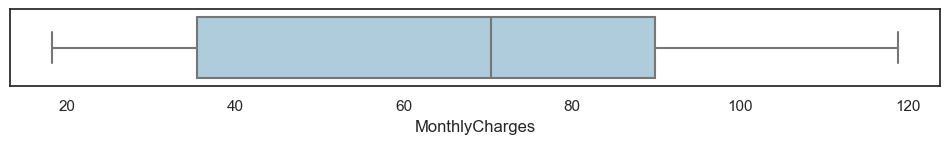

In [18]:
# диаграмм размаха для ежемесячных трат на услуги
plt.figure(figsize=(12, 1))
sns.boxplot(x=df_contract['MonthlyCharges'])
plt.show()

In [19]:
# статистические данные ежемесячных  расходов
df_contract['MonthlyCharges'].describe()

count   7043.0000
mean      64.7617
std       30.0900
min       18.2500
25%       35.5000
50%       70.3500
75%       89.8500
max      118.7500
Name: MonthlyCharges, dtype: float64

Для признака **TotalCharges** построить гистрограмму не получается, нужно выяснять в чем причина. Посмотрим на эту колонку

In [20]:
df_contract['TotalCharges'].describe()

count     7043
unique    6658
top           
freq        11
Name: TotalCharges, dtype: object

In [21]:
# в признаке TotalCharges заменим значения на тип float
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
df_contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.8500,31.0400
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.9500,2071.8400
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.8500,226.1700
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3000,1960.6000
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7000,353.5000


In [22]:
# Выведем количество пропусков
df_contract['TotalCharges'].isnull().sum()

11

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п. 1.2.3**
    
- большенство клиентов стараются экономить, ежемесясные расходы составляют порядка 20 у.е.
- по остальным значениям ежемесячных расходом распределение близко к нормальному виду
- медиана ежемесячных расходов - 70.35 у.е.

## Подготовка данных для машинного обучения

### Объединение датафрейма

Для дальнейшего исследовательского анализа данных (**EDA**) и подготовки данных для машинного обучения (**ML**) объединим четыре датафрейма в один **df**

In [23]:
# объединение четырех датафреймов в один по признаку customerID
df = df_personal.merge(df_contract, how = 'left', on = 'customerID')\
    .merge(df_internet, how = 'left', on = 'customerID').\
    merge(df_phone, how = 'left', on = 'customerID')

In [24]:
# проверим результат
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.8500,31.0400,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.9500,2071.8400,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,53.8500,226.1700,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.3000,1960.6000,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7000,353.5000,Fiber optic,No,No,No,No,No,No,No


Посмотрим итоговую таблицу после объединения. Выведем общую информацию функцией **df_info**

In [25]:
df_info(df)

----------------------------------------------------------------------------------------------------
Общая информамия о датафрейме:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7032 non-null   float64
 1

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.8500,31.0400,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.9500,2071.8400,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,53.8500,226.1700,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.3000,1960.6000,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7000,353.5000,Fiber optic,No,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Количество пропусков
----------------------------------------------------------------------------------------------------
StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineBackup        1526
OnlineSecurity      1526
InternetService     1526
MultipleLines        682
TotalCharges          11
gender                 0
customerID             0
PaymentMethod          0
PaperlessBilling       0
Type                   0
EndDate                0
BeginDate              0
Dependents             0
Partner                0
SeniorCitizen          0
MonthlyCharges         0
dtype: int64
----------------------------------------------------------------------------------------------------
Статистические данные датафрейма
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0000,0.1600,0.3700,0.0000,0.0000,0.0000,0.0000,1.0000
MonthlyCharges,7043.0000,64.7600,30.0900,18.2500,35.5000,70.3500,89.8500,118.7500
TotalCharges,7032.0000,2118.6200,2112.7400,19.0500,439.7400,1345.2800,3239.3200,9221.3800


----------------------------------------------------------------------------------------------------
Количество дубликатов:
----------------------------------------------------------------------------------------------------


0

////////////////////////////////////////////////////////////////////////////////////////////////////
Следующий датафрейм


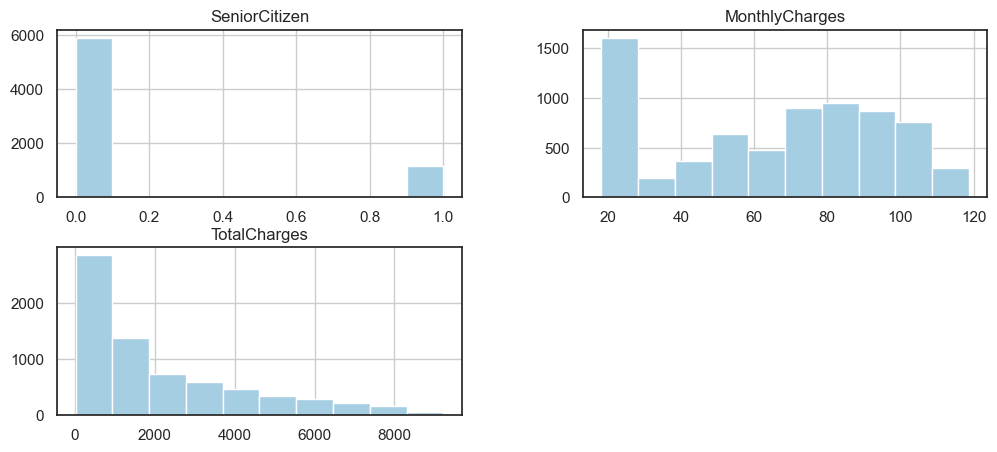

In [26]:
# посмотрим на содержимое датафрейма
df.hist(figsize=(12, 5))
plt.show()

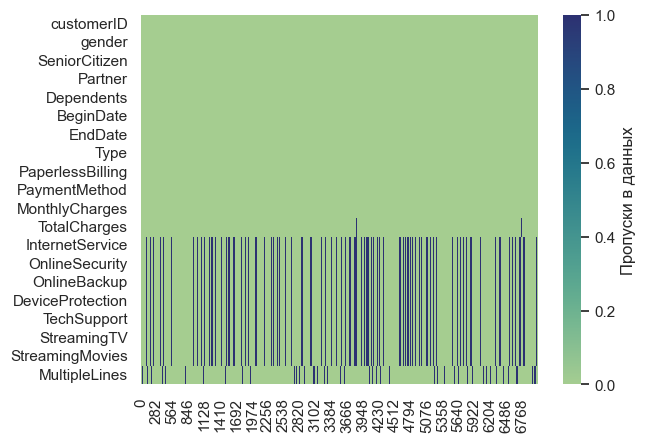

In [27]:
# Визуализация пропущенных данных по строкам датафрейма
sns.heatmap(df.isna().transpose(), cmap="crest", cbar_kws={'label': 'Пропуски в данных'})
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п. 1.2.4 после объединения в единый df**
    
- появились пропуски
        
**Предстоит сделать:**
    
- выяснить причину возникновения пропусков, обработать их
- привести названия признаков к нижнему регистру
- провести анализ корреляции признаков

### Приведение названий признаков к нижнему регистру

Приведем названия признаков объединенного датафрейма к нижнему регистру разделив слова нижним подчеркиванием используя регулярные выражения

In [28]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

# выведем названия признаков для проверки результата
df.columns

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 'streaming_movies', 'multiple_lines'], dtype='object')

### Корреляция признаков

Посмотрим на матрицу корреляции признаков

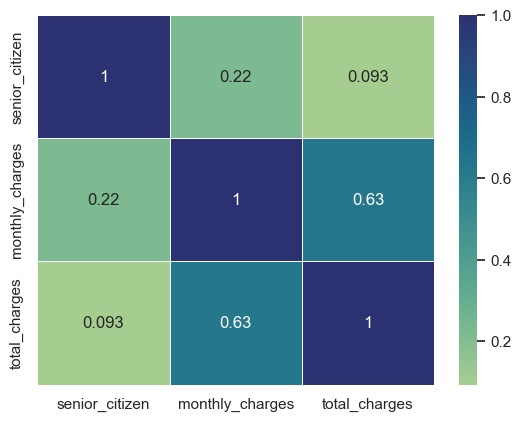

In [29]:
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap='crest')
plt.show()

### Пропуски в данных

<div style='border:solid green 3px; padding: 20px'>

**ВАЖНОЕ ЗАМЕЧАНИЕ**

На основе инфоромации о данных п. 1.2.4 полной таблицы есть много пропусков 1526 строк для признаков **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**, что составляет 21.7% от общего количества (7043) и 682 строк для признака **MultipleLines**, что составляет 9.7%. При этом значения в признаках (Yes/No) указывает на использование услуги. Логично предположить, что отсутствие какого-либо значения вероятно соотвествует значению **No**. Заменим пропуски в этих признаках на значение **No**

In [30]:
# список признаков с пропусками
list_fillna = ['online_security',
               'online_backup',
               'device_protection',
               'tech_support',
               'streaming_t_v',
               'streaming_movies',
               'internet_service',
               'multiple_lines']

In [31]:
for i in list_fillna:
    print(i, df[i].unique())

online_security ['No' 'Yes' nan]
online_backup ['Yes' 'No' nan]
device_protection ['No' 'Yes' nan]
tech_support ['No' 'Yes' nan]
streaming_t_v ['No' 'Yes' nan]
streaming_movies ['No' 'Yes' nan]
internet_service ['DSL' 'Fiber optic' nan]
multiple_lines [nan 'No' 'Yes']


In [32]:
# заполним пропуски значением "No":
df[list_fillna] = df[list_fillna].fillna('No')

In [33]:
# проверим результат заполнения пропусков
df.isnull().sum().sort_values(ascending=False)

total_charges        11
customer_i_d          0
gender                0
streaming_movies      0
streaming_t_v         0
tech_support          0
device_protection     0
online_backup         0
online_security       0
internet_service      0
monthly_charges       0
payment_method        0
paperless_billing     0
type                  0
end_date              0
begin_date            0
dependents            0
partner               0
senior_citizen        0
multiple_lines        0
dtype: int64

Посмотрим на строки с пропусками в признаке **total_charges**

In [34]:
# Вывод строк с пропусками в признаке total_charges
df[df['total_charges'].isnull()]

,customer_i_d,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.5500,NaN,DSL,Yes,No,Yes,Yes,Yes,No,No
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,No,Two year,No,Mailed check,20.2500,NaN,No,No,No,No,No,No,No,No
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,80.8500,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,25.7500,NaN,No,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,No,Two year,No,Credit card (automatic),56.0500,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,No
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,19.8500,NaN,No,No,No,No,No,No,No,No
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,25.3500,NaN,No,No,No,No,No,No,No,Yes
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,20.0000,NaN,No,No,No,No,No,No,No,No
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,No,One year,Yes,Mailed check,19.7000,NaN,No,No,No,No,No,No,No,No
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,No,Two year,No,Mailed check,73.3500,NaN,DSL,No,Yes,Yes,Yes,Yes,No,Yes


<div style='border:solid green 3px; padding: 20px'>

**ВАЖНОЕ ЗАМЕЧАНИЕ**

Во всех строках признака **total_charges** одна и та же дата - 01.02.2020г. и она совпадает с датой выгрузки датафреймов. Очевидно, что клиенты только заключили договор и они еще не оплачивали услуги связи. **Такие пропуски заменим нулями**

In [35]:
df['total_charges'] = df['total_charges'].fillna(0)

Проверим результат после заполнения всех пропусков

In [36]:
df.isnull().sum().sort_values(ascending=False)

customer_i_d         0
gender               0
streaming_movies     0
streaming_t_v        0
tech_support         0
device_protection    0
online_backup        0
online_security      0
internet_service     0
total_charges        0
monthly_charges      0
payment_method       0
paperless_billing    0
type                 0
end_date             0
begin_date           0
dependents           0
partner              0
senior_citizen       0
multiple_lines       0
dtype: int64

### Распределение заключенных договоров по годам

In [37]:
df['begin_date'] = pd.to_datetime(df['begin_date'], format='%Y-%m-%d')

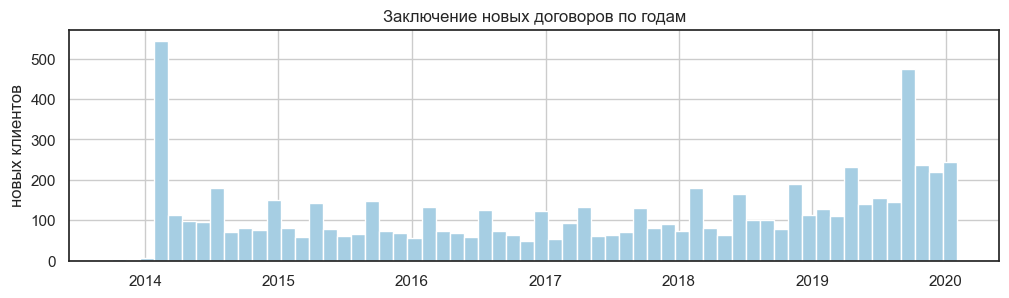

In [38]:
# график количества заключенных договоров по годам
plt.figure(figsize = (12, 3))
df['begin_date'].hist(bins=60);
plt.title('Заключение новых договоров по годам')
plt.ylabel('новых клиентов')

plt.show()

### Создание новых признаков и их анализ

Заменим значения 'No' в столбце 'end_date' в датафрейме на значение '2020-02-01', так как эта дата соответствует дате выгрузки данных.

In [39]:
df['end_date'] = df['end_date'].replace('No', '2020-02-01')

Создадим целевой признак **target**, в который запишем клиентов которые ушли / остались (0 / 1). Значения в столбце **target** зависят от значений в столбце **end_date**. Если значение в столбце **end_date** не равно '2020-02-01', то в столбце **target** будет значение 1, иначе - 0.

In [40]:
df['target'] = df['end_date'].apply(lambda x: 1 if x != '2020-02-01' else 0)

Создадим новый признак **duration** — длительность пользования клиентов услугами оператора (в днях)

In [41]:
# преобразуем данные в признаках 'end_date' и 'begin_date' в формат даты и времени
df[['end_date', 'begin_date']] = df[['end_date', 'begin_date']].astype("datetime64[ns]")

# новые признак в котором считается продолжительность в днях пользования услугами оператора 
df['duration'] = (df.end_date - df.begin_date).dt.days

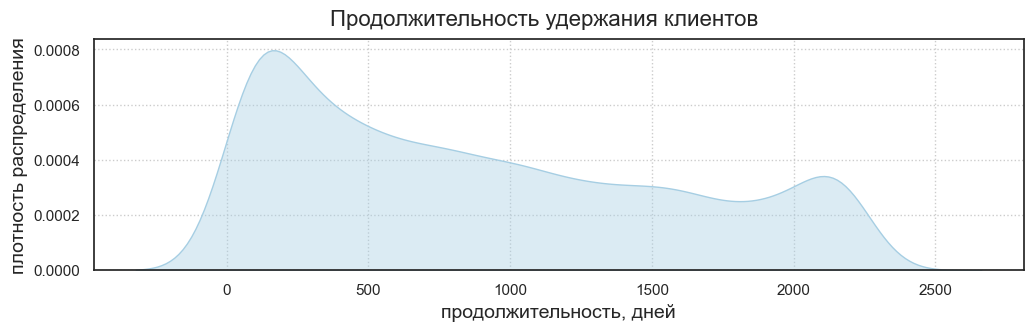

In [42]:
# отрисовка графика продолжительности удержания клиентов функцией plot_kde
plot_kde(data = df.loc[df['duration'] > 0]['duration'], 
        xlabel = 'продолжительность, дней', 
        figsize = (12, 3), 
        suptitle = 'Продолжительность удержания клиентов', 
        ylabel = 'плотность распределения')

plt.show()

In [43]:
df.columns

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 'streaming_movies', 'multiple_lines', 'target', 'duration'], dtype='object')

### Удаление лишних признаков

Признаки на удаление:

- gender — пол клиента удалим, так как пользователей 50/50 мужчин/женщин
- begin_date и end_date — дата заключения / расторжения договора не окажет влияние на обучение моделей ML

In [44]:
# удаление признаков
df = df.drop(['customer_i_d', 'gender', 'begin_date', 'end_date'], axis = 1)

In [45]:
# проверка результата удаления
df.head(3)

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,target,duration
0,0,Yes,No,Month-to-month,Yes,Electronic check,29.8500,31.0400,DSL,No,Yes,No,No,No,No,No,0,31
1,0,No,No,One year,No,Mailed check,56.9500,2071.8400,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,0,No,No,Month-to-month,Yes,Mailed check,53.8500,226.1700,DSL,Yes,Yes,No,No,No,No,No,0,123


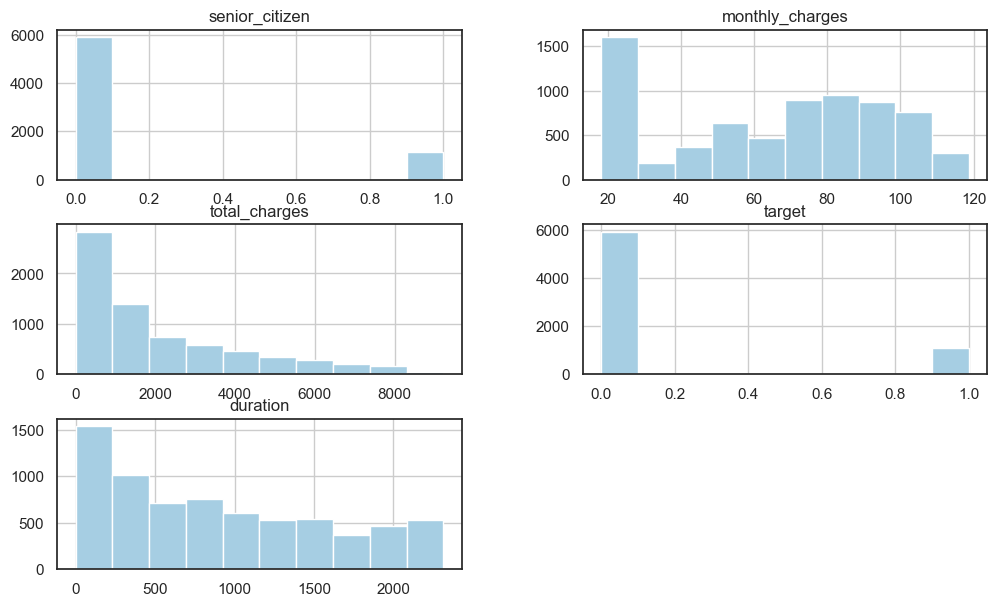

In [46]:
# посмотрим на содержимое датафрейма
df.hist(figsize=(12, 7))
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Выводы п. 1.3.7:**
    
- после объединения четырех датафреймов в единую таблицу характер распределения значений в признаках **monthly_charges, total_charges, senior_citizen** остались такими же, выводы по ним были сделаны в п.1.2.4
- для признака **duration** - продолжительность ударжания клиентов в днях, характерен спад, т.е. чем дольше клиент пользуется услугами оператора, тем больше возникает желание уйти. Пик количества пользователей соответствует полугодовому пользования услугами, что вероятно, соответствует акциям привлечения новых клиентов после окончания которых они уходят. Следовательно компании стоит задуматься над УТП для более длительного ударжания 
- по целевому признаку target, что клиент ушел, видно, что более 80% клиентов остались

### Исследание признаков на мультиколлинеарность методом phik

In [47]:
# построение таблицы (матрицы) корреляции методом phik
phik_view = df.phik_matrix()
phik_view.round(2)

interval columns not set, guessing: ['senior_citizen', 'monthly_charges', 'total_charges', 'target', 'duration']


,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,target,duration
senior_citizen,1.0000,0.0200,0.3200,0.0900,0.2400,0.2900,0.3000,0.1400,0.1600,0.0600,0.1000,0.0900,0.0900,0.1600,0.1900,0.2200,0.0900,0.0600
partner,0.0200,1.0000,0.6500,0.1800,0.0100,0.2400,0.2000,0.3800,0.0000,0.2200,0.2200,0.2400,0.1900,0.1900,0.1800,0.2200,0.2300,0.4500
dependents,0.3200,0.6500,1.0000,0.1500,0.1700,0.2200,0.1800,0.0800,0.1100,0.1200,0.0300,0.0100,0.1000,0.0200,0.0600,0.0300,0.0500,0.2000
type,0.0900,0.1800,0.1500,1.0000,0.1100,0.2800,0.3900,0.4700,0.5100,0.1500,0.1000,0.1400,0.1800,0.0700,0.0700,0.0700,0.0900,0.6300
paperless_billing,0.2400,0.0100,0.1700,0.1100,1.0000,0.3700,0.4700,0.2000,0.2300,0.0000,0.2000,0.1600,0.0600,0.3400,0.3300,0.2500,0.0800,0.0300
payment_method,0.2900,0.2400,0.2200,0.2800,0.3700,1.0000,0.4000,0.3400,0.3200,0.2600,0.2800,0.3100,0.2700,0.3800,0.3800,0.3400,0.2100,0.3500
monthly_charges,0.3000,0.2000,0.1800,0.3900,0.4700,0.4000,1.0000,0.7100,0.9200,0.5500,0.6300,0.6700,0.5800,0.8400,0.8300,0.6800,0.2300,0.3900
total_charges,0.1400,0.3800,0.0800,0.4700,0.2000,0.3400,0.7100,1.0000,0.4900,0.5200,0.6200,0.6400,0.5500,0.6400,0.6400,0.5700,0.3000,0.8500
internet_service,0.1600,0.0000,0.1100,0.5100,0.2300,0.3200,0.9200,0.4900,1.0000,0.2400,0.2300,0.2300,0.2400,0.2700,0.2700,0.2300,0.0600,0.0600
online_security,0.0600,0.2200,0.1200,0.1500,0.0000,0.2600,0.5500,0.5200,0.2400,1.0000,0.4300,0.4200,0.5300,0.2700,0.2900,0.1500,0.1300,0.4000


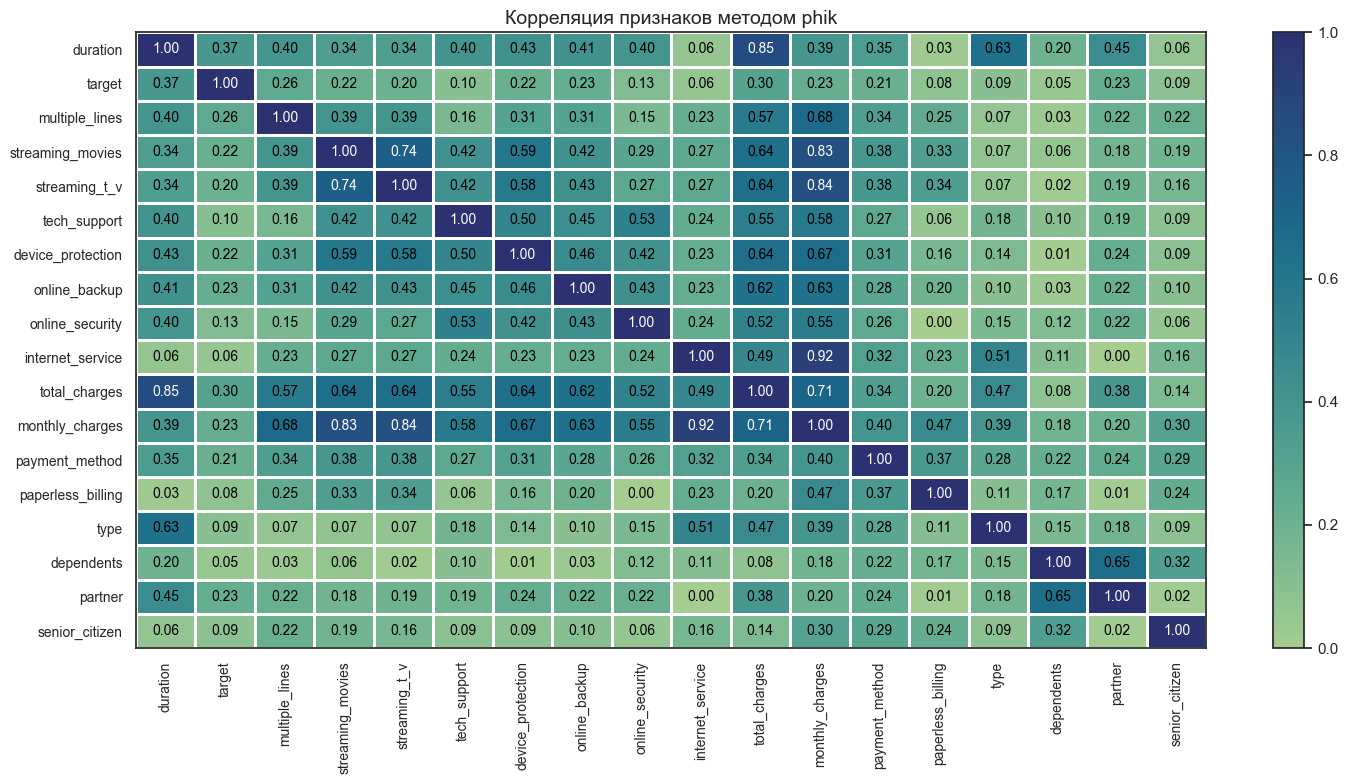

In [48]:
# графическое представление матрицы корреляции методом phik
plot_correlation_matrix(phik_view.values,
                        x_labels=phik_view.columns,
                        y_labels=phik_view.index,
                        vmin=0,
                        vmax=1,
                        color_map = "crest",
                        title = "Корреляция признаков методом phik",
                        fontsize_factor = 1,
                        figsize = (15, 8))
plt.tight_layout()

Посчитаем коэффициента инфляции дисперсии (VIF) для оценки значимости признаков

In [49]:
df_vif = df._get_numeric_data()
df_vif
vif = pd.Series([
    variance_inflation_factor(df_vif.values, i)
    for i in range(1, df_vif.shape[1])
],
                index=df_vif.columns[1:])

vif.sort_values(ascending=False)

total_charges     7.8825
duration          6.2039
monthly_charges   3.8630
target            1.2246
dtype: float64

Удалим коррелируеющие признаки, чтобы избежать мультиколлинеарности при обучении моделей

In [50]:
df = df.drop(['internet_service',  'streaming_t_v', 'streaming_movies', 'total_charges'], axis = 1)

In [51]:
df.head(3)

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,online_security,online_backup,device_protection,tech_support,multiple_lines,target,duration
0,0,Yes,No,Month-to-month,Yes,Electronic check,29.8500,No,Yes,No,No,No,0,31
1,0,No,No,One year,No,Mailed check,56.9500,Yes,No,Yes,No,No,0,1036
2,0,No,No,Month-to-month,Yes,Mailed check,53.8500,Yes,Yes,No,No,No,0,123


Посмотрим на целевой признак на предмет дисбаланса классов

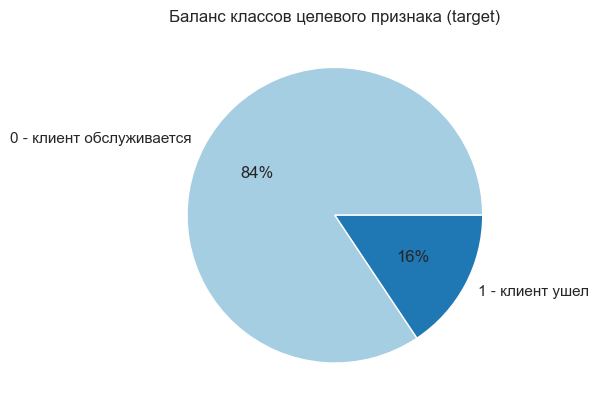

In [52]:
plt.pie(df.target.value_counts(), labels = ['0 - клиент обслуживается', '1 - клиент ушел'], autopct='%1.0f%%')
plt.title('Баланс классов целевого признака (target)')

plt.show()

Дисбаланс классов есть. Это нужно учесть при подготовке данных для машинного обучения. Метрика **AUC-ROC** не чувствительна к дисбалансу классов, балансировать не нужно.

## Обучение моделей ML. Выбор лучшей модели и параметров

### Разделение на выборки train/test

In [53]:
# создание признаков features и целевого признака target
features = df.drop(['target'], axis=1)
target = df['target']

# разделим данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = RANDOM_STATE, stratify = target)

print("Размер обучающей выборки с признаками:", features_train.shape)
print("Размер тестовой выборки с признаками:", features_test.shape)
print("Размер обучающей выборки с целевым признаком:", target_train.shape)
print("Размер тестовой выборки с целевым признаком:", target_test.shape)

Размер обучающей выборки с признаками: (5282, 13)
Размер тестовой выборки с признаками: (1761, 13)
Размер обучающей выборки с целевым признаком: (5282,)
Размер тестовой выборки с целевым признаком: (1761,)


### Обучения моделей ML

Преобразуем столбец 'senior_citizen' в тип данных 'object', затем создадим два списка: 'ohe_features', содержащий имена всех столбцов с типом данных 'object', и 'num_features', содержащий имена всех столбцов, кроме тех, которые имеют тип данных 'object'

In [54]:
features_train.senior_citizen = features_train.senior_citizen.astype('object')

cat_features = features_train.select_dtypes(include='object').columns.to_list()
num_features = features_train.select_dtypes(exclude='object').columns.to_list()

print("="*100)
print("Перечень категориальных признаков:", cat_features)
print("="*100)
print("Перечень числовых признаков:", num_features)
print("="*100)

Перечень категориальных признаков: ['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing', 'payment_method', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'multiple_lines']
Перечень числовых признаков: ['monthly_charges', 'duration']


Обучение будем проводить на моделях:
- LogisticRegression (LR)
- DecisionTreeClassifier (DTC)
- RandomForestClassifier (RFC)
- CatBoostClassifier (CBC)

Пайплайн для этих моделей был описан в функциях preprocessor, pipeline, param_grid. Вызовем их и получим результаты всех моделей в списке **best_model_list**

In [55]:
# обученные модели в одном списке
best_model_list = create_param_grid(features_train, target_train)
best_model_list

---------------------------------------------------------------------------------------------------- 
Model:
LogisticRegression:

Params:
{'model__C': 1000.0, 'model__penalty': 'l1'}

ROC-AUC:
0.7478596206763142

---------------------------------------------------------------------------------------------------- 
Model:
DecisionTreeClassifier:

Params:
{'model__criterion': 'gini', 'model__max_depth': 5}

ROC-AUC:
0.7779395846827304

---------------------------------------------------------------------------------------------------- 
Model:
RandomForestClassifier:

Params:
{'model__max_depth': 5, 'model__n_estimators': 100}

ROC-AUC:
0.8134745545359305

---------------------------------------------------------------------------------------------------- 
Model:
CatBoostClassifier:

Params:
{'model__depth': 4, 'model__learning_rate': 0.03}

ROC-AUC:
0.8819291995774665



[Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['monthly_charges',
                                                    'duration']),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    OneHotEncoder(drop='first',
                                                                                  handle_unknown='ignore'))]),
                                                   ['senior_citizen', 'partner',
                                                    'dependents', 'type',
                                                    'paperless_bi

## Проверка модели

Проверим наилучшую модель на тестовой выборке

In [56]:
# выбираем лучшую модель
print('='*100)
print('ЛУЧШАЯ МОДЕЛЬ')
best_model_list[-1]

ЛУЧШАЯ МОДЕЛЬ


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['monthly_charges',
                                                   'duration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['senior_citizen', 'partner',
                                                   'dependents', 'type',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'multiple_lines'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000002662C84BF40>)])

Accuracy: 0.902328222600795
ROC-AUC: 0.9045980668053346


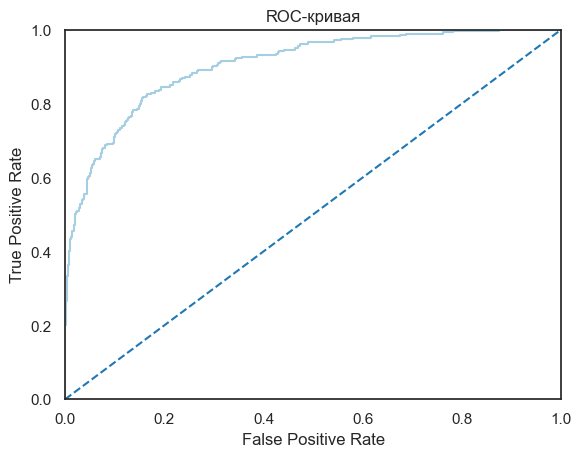

In [57]:
# предсказание лучшей модели на тесте
model_best = cb.CatBoostClassifier(random_state = RANDOM_STATE,
                                   depth = 4,
                                   learning_rate = 0.03,
                                   cat_features = cat_features,
                                   verbose = False)

model_best.fit(features_train, target_train)

predicted_test = model_best.predict(features_test)
predict_true_probalities = model_best.predict_proba(features_test)[:, 1]

print(f'Accuracy: {accuracy_score(model_best.predict(features_test), target_test)}')
print(f'ROC-AUC: {roc_auc_score(target_test, model_best.predict_proba(features_test)[:, 1])}')

plot_roc_curve(target_test, predict_true_probalities)

Посмотрим на матрицу ошибок

Количество записей: 1761



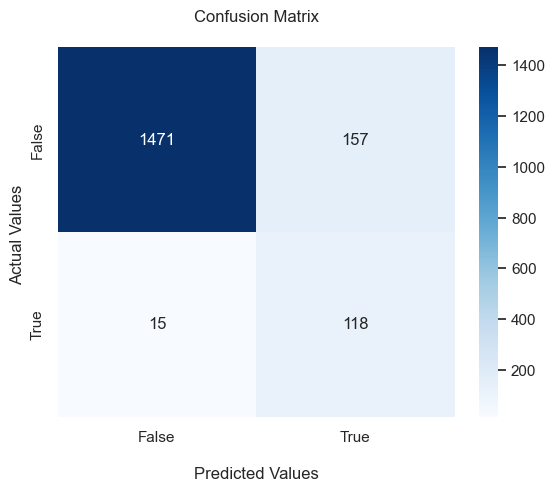

In [58]:
plot_conf_matr(model_best, features_test, target_test)

## Важность признаков

Создадим таблицу, показывающую важность каждого признака в модели из значений вектора model_best.feature_importances_ и столбцов, соответствующих именам признаков

In [59]:
feature_importance = pd.DataFrame(model_best.feature_importances_,
                                       index=features_test.columns)
feature_importance

,0
senior_citizen,1.0283
partner,2.9603
dependents,0.5328
type,10.3463
paperless_billing,0.7961
payment_method,3.3664
monthly_charges,9.6676
online_security,0.5329
online_backup,1.8234
device_protection,1.1498


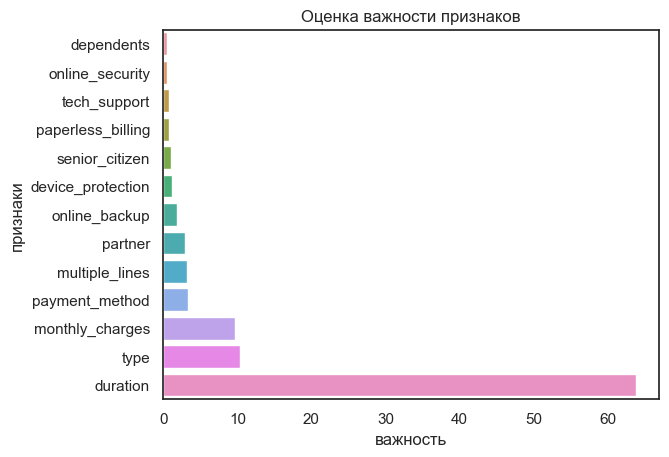

In [60]:
# вызовем функцию для оценки важности признаков
plot_importances(feature_importance)

# ТЕХНИЧЕСКИЙ ОТЧЕТ

## МОДЕЛЬ ПРЕДСКАЗАНИЯ ОТТОКА КЛИЕНТОВ ОПЕРАТОРА СВЯЗИ «НИЕДИНОГОРАЗРЫВА.КОМ»

## Этапы выполнения работы

1) Постановка задачи. Уточнение деталей с заказчиком. Получение исходных данных
2) Исследовательский анализ данных
3) Подготовка данных для машинного обучения
4) Обучение моделей ML. Выбор лучшей модели и параметров
5) Подведение итогов. Рекомендации заказчику

## Цель работы

Оператору связи необходимо **прогнозировать отток клиентов**. Если клиент **планирует уйти**, ему будут предложены промокоды и специальные условия.

Для менеджера по удержанию клиентов нужно понимать кому из клиентов нужно предлагать специальные условия, так как:
- для удержания действующего клиента требуются затраты, целью которых является получение дальнейшей прибыли, а не убытка
- привлечение новых клиентов более затратно, чем удержать действующих

**Конечный результат работы**

Получить модель **ML**, предсказывающая клиента, которых учет уйти с точностью не менее 85%

**Исходные данные**
Персональные данные о клиентах, информация об их тарифах и договорах

## Раздел 1. Постановка задачи. Получение исходных данных

Оператор предоставляет два основных типа услуг: 

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Исходные файлы с данными**

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.


**Признаки данных**

- **customerID** - уникальный идентификатор пользователя
- **BeginDate** – дата начала пользования услугами,
- **EndDate** – дата окончания пользования услугами,
- **Type** – тип оплаты: ежемесячный, годовой и тд,
- **PaperlessBilling** – электронный платёжный документ,
- **PaymentMethod** – способ оплаты,
- **MonthlyCharges** – ежемесячные траты на услуги,
- **TotalCharges** – всего потрачено денег на услуги
- **gender** - пол клиента
- **Senior Citizen** – наличие пенсионного статуса по возрасту
- **Dependents** – наличие иждивенцев
- **Partner** – наличие супруга(и)
- **InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies** - вид услуг, используемый клиентом
- **MultipleLines** – наличие возможности ведения параллельных линий во время звонка

**Результаты анализа исходных данных отдельных датафреймов**
    
- У датафреймов разное количество строк (7043, 5517 и 6361)
- Названия признаков в виде слитных слов, разделенных прописной буквой (например, customerID). Нужно привести в змеиный вид (в виде customer_ID)
- Пропусков нет
- Дубликатов нет
- Данные имеют как категориальное значение (например, PaperlessBilling, PaymentMethod), так и числовые значения (например признак MonthlyCharges, 29.85)
- признак TotalCharges имеет тип данных **object**, однако, глядя на первые строки таблицы в этой колонке значения похожи на значения в колонке **MonthlyCharges**. Нужно выяснить в чем причина и привести данные к нужному формату. Данную рпоцедуру проведем в разделе *1.3 Подготовка данных для машинного обучения*
- по периодичности оплаты преобладают ежемесячные платежы
- наиболее часто клиенты принимают электронные платежные документы
- способ оплаты преобладает электронные переводы, в целом способы оплаты распределены почти равномерно
- по половому признаку количество клиентов одинаковое
- доля клиентов пенсионного возрастасоставляет чуть более 16%
- доля клиентов у которых есть иждивенцы - 30%
- по использованию таких видов услуг как интернет, онлайн-безопасность и другие - распределением практически равномерное (да/нет)

## Раздел 2. Исследовательский анализ данных

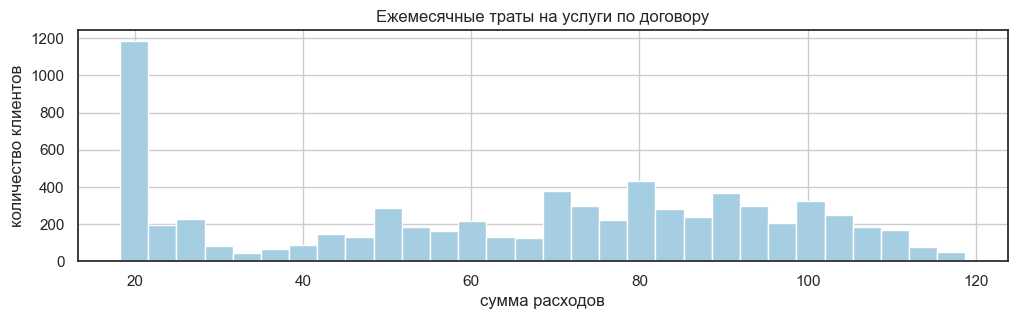

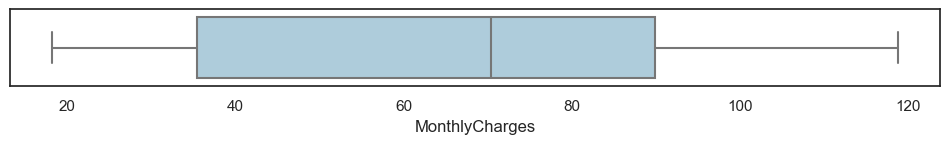

- большенство клиентов стараются экономить, ежемесясные расходы составляют порядка 20 у.е.
- по остальным значениям ежемесячных расходом распределение близко к нормальному виду
- медиана ежемесячных расходов - 70.35 у.е.

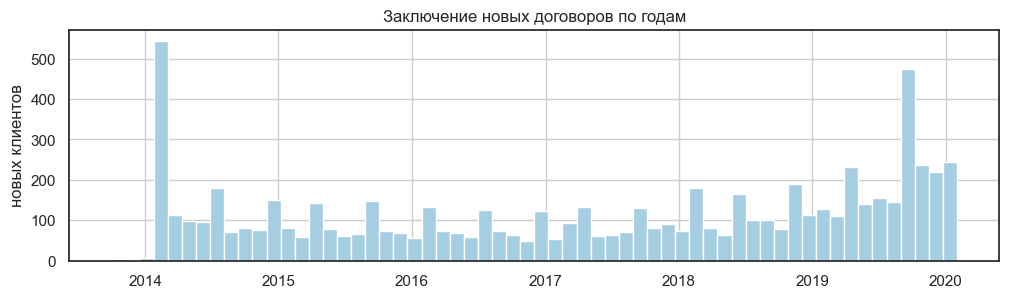

Матрица корреляции признаков:
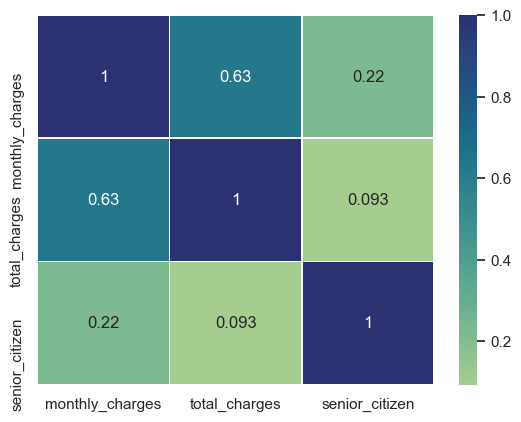

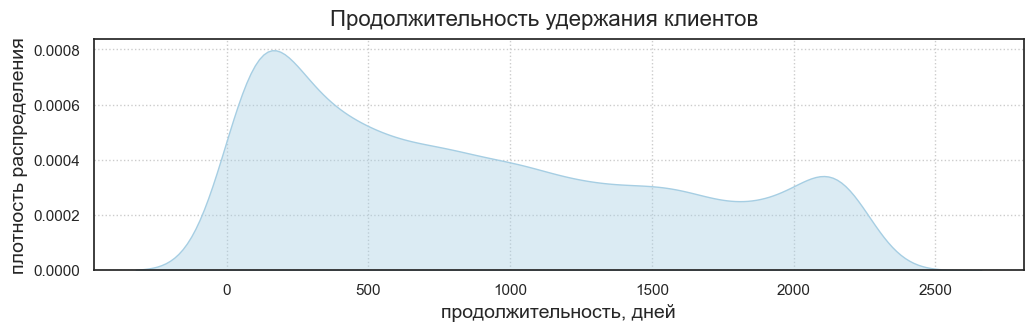

**МУЛЬТИКОЛЛИНЕАРНОСТЬ ПРИЗНАКОВ**
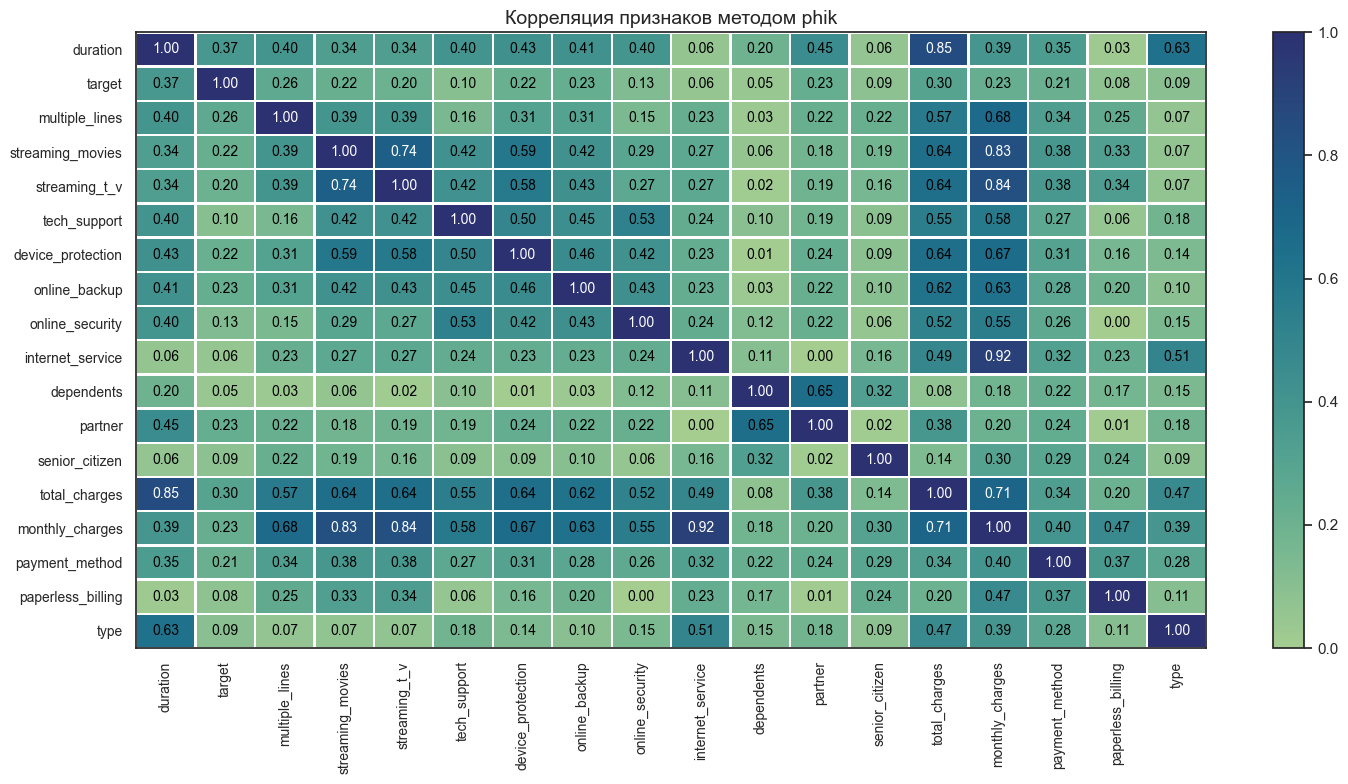

**ДИСБАЛАНС КЛАССОВ ЦЕЛЕВОГО ПРИЗНАКА**

Дисбаланс классов есть. Это нужно учесть при подготовке данных для машинного обучения. Метрика **AUC-ROC** не чувствительна к дисбалансу классов, балансировать не нужно.
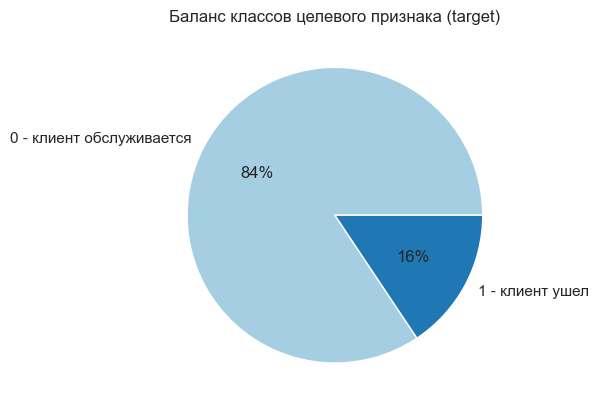

После объединения четырех датафреймов в единую таблицу характер распределения значений в признаках **monthly_charges, total_charges, senior_citizen** остались такими же в Разделе 1.

Для признака **duration** - продолжительность ударжания клиентов в днях, характерен спад, т.е. чем дольше клиент пользуется услугами оператора, тем больше возникает желание уйти. Пик количества пользователей соответствует полугодовому пользования услугами, что вероятно, соответствует акциям привлечения новых клиентов после окончания которых они уходят. Следовательно компании стоит задуматься над УТП для более длительного ударжания 

По целевому признаку target, что клиент ушел, видно, что более 80% клиентов остались

## Раздел 3. Подготовка данных для машинного обучения

После объединения четырех датафреймов по признаку **customerID** появились пропуски, по которым было проведено:    
- выяснена причина возникновения пропусков, обработали их
- приведены названия признаков к нижнему регистру
- проведен анализ корреляции признаков

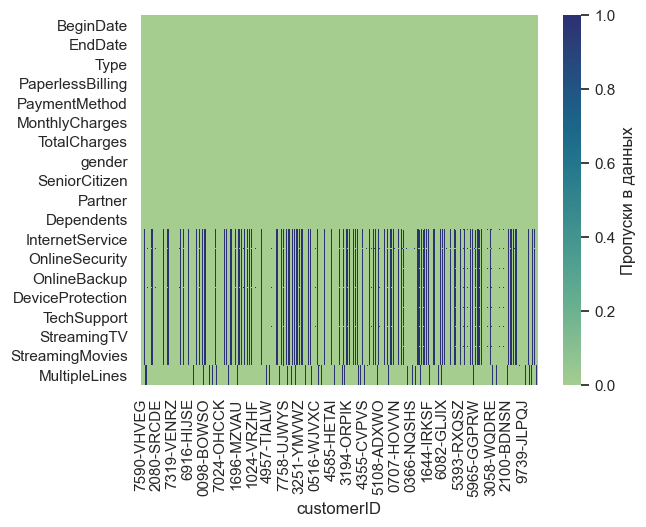

**ОБРАБОТКА ПРОПУСКОВ**

По заполнению пропусков:
В объединенной таблице есть много пропусков 1526 строк для признаков **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**, что составляет 21.7% от общего количества (7043) и 682 строк для признака **MultipleLines**, что составляет 9.7%. При этом значения в признаках (Yes/No) указывает на использование услуги. Логично предположить, что отсутствие какого-либо значения вероятно соотвествует значению **No**.

Выполнено **заполнение пропусков** в этих признаках на значение **No**

Во всех строках признака **total_charges** одна и та же дата - 01.02.2020г. и она совпадает с датой выгрузки датафреймов. Очевидно, что клиенты только заключили договор и они еще не оплачивали услуги связи. **Такие пропуски были заполнены нулями**

**СОЗДАНЫ НОВЫЕ ПРИЗНАКИ**

Был создан целевой признак **target**, в который записаны клиенты которые ушли / остались (0 / 1). Значения в столбце target зависят от значений в столбце end_date. Если значение в столбце end_date не равно '2020-02-01', то в столбце target будет значение 1, иначе - 0. Заменены значения 'No' в столбце 'end_date' в датафрейме на значение '2020-02-01', так как эта дата соответствует дате выгрузки данных.

Создан новый признак **duration** — длительность пользования клиентов услугами оператора (в днях)

**УДАЛЕНЫ ЛИШНИЕ ПРИЗНАКИ**

- **gender** — пол клиента удалим, так как пользователей 50/50 мужчин/женщин
- **begin_date** и **end_date** — дата заключения / расторжения договора не окажет влияние на обучение моделей ML

**Признаки, использованные для обучения модели ML:**

In [61]:
features.columns

Index(['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'multiple_lines', 'duration'], dtype='object')

## Раздел 4 Обучение моделей ML. Выбор лучшей модели и параметров

Обучение будем проводилось на моделях:
- LogisticRegression (LR)
- DecisionTreeClassifier (DTC)
- RandomForestClassifier (RFC)
- CatBoostClassifier (CBC)

Размер обучающей выборки с признаками: (5282, 13) 

Размер тестовой выборки с признаками: (1761, 13)

Размер обучающей выборки с целевым признаком: (5282,)

Размер тестовой выборки с целевым признаком: (1761,)

**РЕЗУЛЬТАТЫ МОДЕЛЕЙ**

Model:
LogisticRegression:

Params:
{'model__C': 1000.0, 'model__penalty': 'l1'}

ROC-AUC:
0.7478596206763142

---------------------------------------------------------------------------------------------------- 
Model:
DecisionTreeClassifier:

Params:
{'model__criterion': 'gini', 'model__max_depth': 5}

ROC-AUC:
0.7779395846827304

---------------------------------------------------------------------------------------------------- 
Model:
RandomForestClassifier:

Params:
{'model__max_depth': 5, 'model__n_estimators': 100}

ROC-AUC:
0.8134745545359305

---------------------------------------------------------------------------------------------------- 
Model:
CatBoostClassifier:

Params:
{'model__depth': 4, 'model__learning_rate': 0.03}

ROC-AUC:
0.8819291995774665

**ЛУЧШАЯ МОДЕЛЬ И ЕЕ ПАРАМЕТРЫ**

CatBoostClassifier:

Params:
{'model__depth': 4, 'model__learning_rate': 0.03}

ROC-AUC:
0.8819291995774665

**РЕЗУЛЬТАТЫ ЛУЧШЕЙ МОДЕЛИ НА ТЕСТЕ**

Accuracy: 0.902

ROC-AUC: 0.905

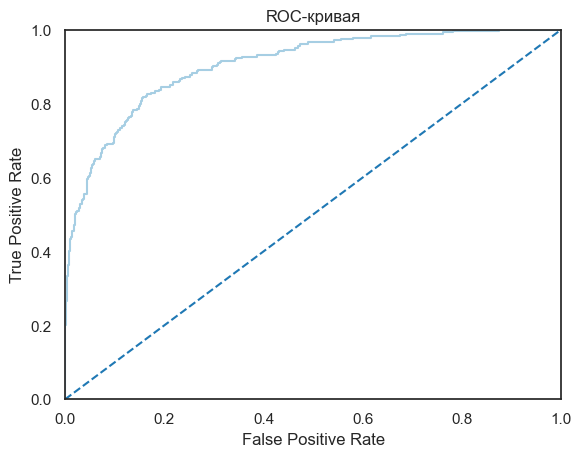

**МАТРИЦА ОШИБОК**
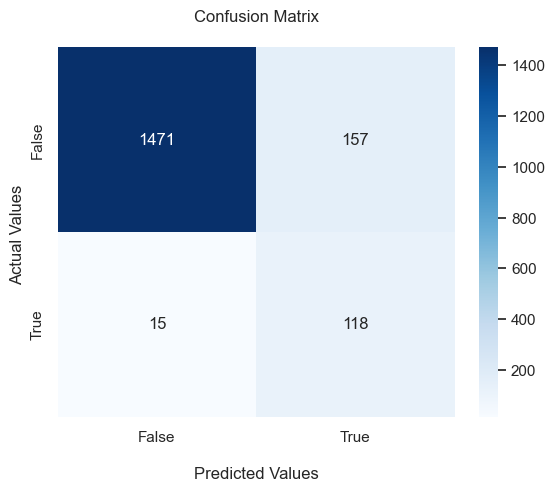

**РАСПРЕДЕЛЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ**
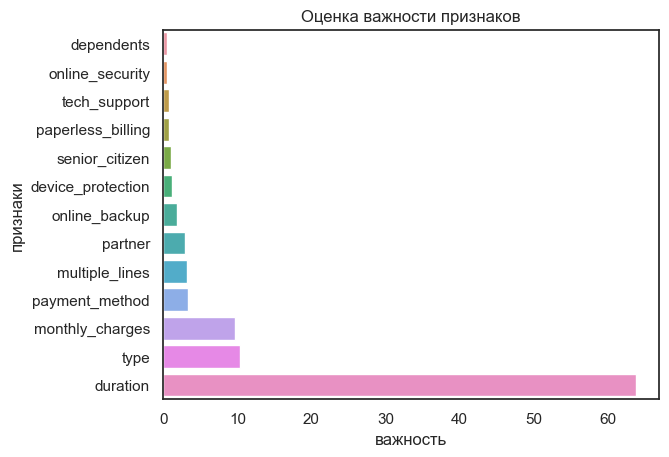

## Раздел 5. Подведение итогов. Рекомендации заказчику

В соответствии с поставленной задачей - спрогнозировать отток клиентов, чтобы клиенту, который планирует уйти, можно было предложить промокоды и специальные условия, была получена **модель**, которая с **необходимой точностью (более 85%)** указывает на клиента, с которым предстоит поработать для удержания. Удерживать клиентов важно, так как:
1) для удержания действующего клиента требуются затраты, целью которых является получение дальнейшей прибыли, а не убытка
2) привлечение новых клиентов более затратно, чем удержать действующих

Лучше всего с поставленной задачей на тренировочных данных справляется модель с параметрами:

CatBoostClassifier:

Params: {'model__depth': 4, 'model__learning_rate': 0.03}

ROC-AUC: 0.8819291995774665

**РЕЗУЛЬТАТЫ ЛУЧШЕЙ МОДЕЛИ НА ТЕСТЕ**

Accuracy (точность): 90.2%

Для признака **duration** - продолжительность ударжания клиентов в днях, характерен спад, т.е. чем дольше клиент пользуется услугами оператора, тем больше возникает желание уйти. Пик количества пользователей соответствует полугодовому пользования услугами, что вероятно, соответствует акциям привлечения новых клиентов после окончания которых они уходят. Следовательно компании стоит задуматься над УТП для более длительного ударжания 

По целевому признаку target, что клиент ушел, видно, что более 80% клиентов остались

<div class="alert alert-success">
<b
    
РЕКОМЕНДАЦИЯ РЕВЬЮЕРА:

- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/
</div>